# # Employee Retention Analysis
----
Employees are the life blood of the company. Therefore turnover is very costly to the company. I would like to analyze this hr data set to see how to retain employees

First I start with importing the necessary programs and establish a file path to the proper data set.

polynnomial regression
how to reduce dimensionality
multiple r^2
sklearn


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

%matplotlib inline

file_path = ('human-resources-analytics/HR_comma_sep.csv')

In [16]:
pd.read_csv(file_path)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [17]:
df = pd.read_csv(file_path)

In [18]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'number_project': 'projectCount',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [19]:
df.describe()

,satisfaction,last_evaluation,projectCount,average_monthly_hours,years_at_company,Work_accident,turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [21]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [22]:
df.groupby(['department']).sum()['turnover']

department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: turnover, dtype: int64

In [23]:
df.groupby(['department']).sum()['turnover']/df['department'].value_counts()

IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
dtype: float64

<function matplotlib.pyplot.title>

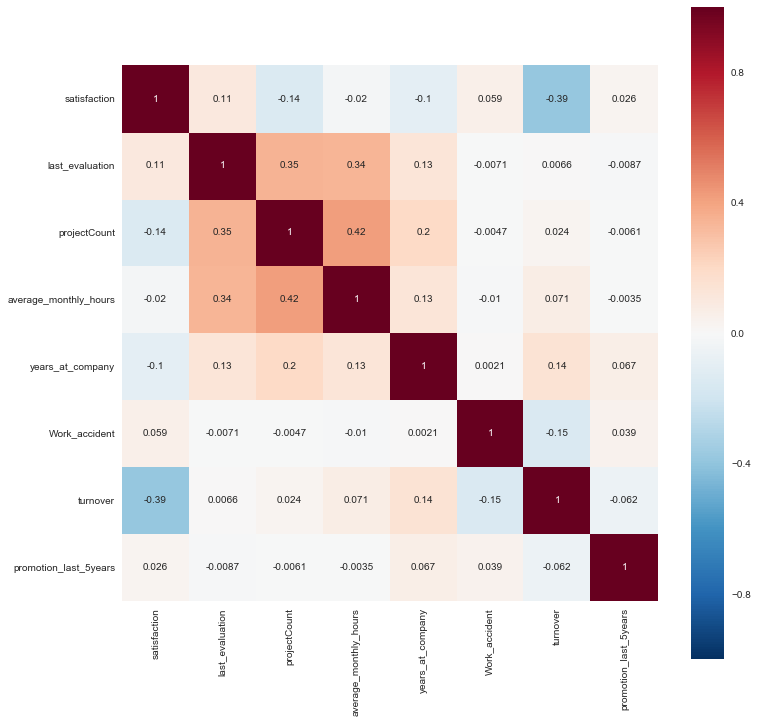

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True)

plt.title

In [25]:
df.dtypes

satisfaction             float64
last_evaluation          float64
projectCount               int64
average_monthly_hours      int64
years_at_company           int64
Work_accident              int64
turnover                   int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [26]:
df[['turnover']]

,turnover
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [27]:
df1 = df[['turnover']]

In [28]:
df1

,turnover
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [29]:
df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]]

,satisfaction,last_evaluation,projectCount,average_monthly_hours,years_at_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


In [30]:
df2 = df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]]

In [34]:
x = array([df2])
y = array([df1])

fit [x,y,2]

NameError: name 'array' is not defined